In [1]:
import pandas as pd
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import matplotlib.pyplot as plt

In [2]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [3]:
train = pd.read_csv('KDDTrain+.txt', header = None).squeeze("columns")

In [4]:
test = pd.read_csv('KDDTest+.txt', header = None).squeeze("columns")

In [5]:
train.columns = columns

In [6]:
test.columns = columns

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
test["flag"].value_counts(100).head(3)

flag
SF     0.659821
REJ    0.170777
S0     0.089292
Name: proportion, dtype: float64

In [9]:
train["flag"].value_counts(100).head(3)

flag
SF     0.594929
S0     0.276655
REJ    0.089170
Name: proportion, dtype: float64

In [10]:
test["protocol_type"].value_counts(100)

protocol_type
tcp     0.837473
udp     0.116262
icmp    0.046265
Name: proportion, dtype: float64

In [11]:
train["protocol_type"].value_counts(100)

protocol_type
tcp     0.815167
udp     0.119018
icmp    0.065816
Name: proportion, dtype: float64

In [12]:
test["service"].value_counts(100).head(2)

service
http       0.348341
private    0.211764
Name: proportion, dtype: float64

In [13]:
train["service"].value_counts(100).head(2)

service
http       0.320211
private    0.173474
Name: proportion, dtype: float64

In [14]:
d1 = list(test["service"].value_counts(100).index)

In [15]:
d2 = list(train["service"].value_counts(100).index)

In [16]:
set(d2) - set(d1)

{'aol', 'harvest', 'http_2784', 'http_8001', 'red_i', 'urh_i'}

In [17]:
set(d1) - set(d2)

set()

In [18]:
train["service"].value_counts()["red_i"]

8

In [19]:
train["service"].value_counts()["urh_i"]

10

In [20]:
train["service"].value_counts()["http_8001"]

2

In [21]:
train["service"].value_counts()["http_2784"]

1

In [22]:
train["service"].value_counts()["harvest"]

2

In [23]:
train["service"].value_counts()["aol"]

2

In [24]:
flags= ["SF", "S0", "REJ"]

In [25]:
train['flag'] = train['flag'].apply(lambda x: 'other' if x not in flags else x)

In [26]:
test['flag'] = test['flag'].apply(lambda x: 'other' if x not in flags else x)

In [27]:
services = ["http", "private"]

In [28]:
train['service'] = train['service'].apply(lambda x: 'other' if x not in services else x)

In [29]:
test['service'] = test['service'].apply(lambda x: 'other' if x not in services else x)

In [30]:
train["service"].value_counts(100)

service
other      0.506315
http       0.320211
private    0.173474
Name: proportion, dtype: float64

In [31]:
test["service"].value_counts(100)

service
other      0.439895
http       0.348341
private    0.211764
Name: proportion, dtype: float64

In [32]:
test.drop('level', axis = 1, inplace = True)

In [33]:
train.drop('level', axis = 1, inplace = True)

In [34]:
train["attack"] = np.where(train["attack"].str.contains("normal"), 0, 1)

In [35]:
test["attack"] = np.where(test["attack"].str.contains("normal"), 0, 1)

In [36]:
train.drop(["urgent", 
            "num_outbound_cmds", 
            "is_host_login", 
            "su_attempted", 
            "num_file_creations", 
            "num_access_files", 
            "dst_host_count", 
            "dst_host_rerror_rate"], axis = 1, inplace = True)

In [37]:
test.drop(["urgent", 
            "num_outbound_cmds", 
            "is_host_login", 
            "su_attempted", 
            "num_file_creations", 
            "num_access_files", 
            "dst_host_count", 
            "dst_host_rerror_rate"], axis = 1, inplace = True)

In [38]:
train.drop(["land", 
            "wrong_fragment", 
            "num_failed_logins", 
            "root_shell",], axis = 1, inplace = True)

In [39]:
test.drop(["land", 
            "wrong_fragment", 
            "num_failed_logins", 
            "root_shell",], axis = 1, inplace = True)

In [40]:
train = pd.get_dummies(train, columns = ["protocol_type", "service", "flag"], prefix = ["protocol_type", "service", "flag"], dtype = "int64")

In [41]:
test = pd.get_dummies(test, columns = ["protocol_type", "service", "flag"], prefix = ["protocol_type", "service", "flag"], dtype = "int64")

In [42]:
train

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,num_shells,is_guest_login,count,...,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_http,service_other,service_private,flag_REJ,flag_S0,flag_SF,flag_other
0,0,491,0,0,0,0,0,0,0,2,...,0,1,0,0,1,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,13,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,123,...,0,1,0,0,0,1,0,1,0,0
3,0,232,8153,0,1,0,0,0,0,5,...,0,1,0,1,0,0,0,0,1,0
4,0,199,420,0,1,0,0,0,0,30,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,184,...,0,1,0,0,0,1,0,1,0,0
125969,8,105,145,0,0,0,0,0,0,2,...,0,0,1,0,0,1,0,0,1,0
125970,0,2231,384,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,144,...,0,1,0,0,1,0,0,1,0,0


In [43]:
test

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,num_shells,is_guest_login,count,...,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_http,service_other,service_private,flag_REJ,flag_S0,flag_SF,flag_other
0,0,0,0,0,0,0,0,0,0,229,...,0,1,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,136,...,0,1,0,0,0,1,1,0,0,0
2,2,12983,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
22540,0,317,938,0,1,0,0,0,0,2,...,0,1,0,1,0,0,0,0,1,0
22541,0,54540,8314,2,1,1,0,0,0,5,...,0,1,0,1,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,4,...,0,0,1,0,1,0,0,0,1,0


In [44]:
y_train = train["attack"]
X_train = train.drop(["attack"], axis = 1)

In [45]:
y_test = test["attack"]
X_test = test.drop(["attack"], axis = 1)

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train_scaled = scaler.transform(X_train)

In [49]:
X_test_scaled = scaler.transform(X_test)

In [100]:
mlpc = MLPClassifier(random_state = 42)
mlpc.fit(X_train_scaled, y_train)

MLPClassifier(random_state=42)

In [102]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7583836053938964

In [314]:
svc_model = SVC(kernel = "rbf").fit(X_train_scaled, y_train)

In [316]:
y_pred = svc_model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7722675656493967

In [53]:
mlpc_params = {"alpha": [0.1, 0.01],
              "hidden_layer_sizes": [(40,),(100,)],
              "solver" : ["adam","sgd"],
              "activation": ["tanh","logistic"]}

In [54]:
mlp_model = MLPClassifier(random_state = 42)

In [55]:
random_search = RandomizedSearchCV(mlp_model, param_distributions=mlpc_params, n_iter=10, cv=5, random_state=42, n_jobs = -1)

In [56]:
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'logistic'],
                                        'alpha': [0.1, 0.01],
                                        'hidden_layer_sizes': [(40,), (100,)],
                                        'solver': ['adam', 'sgd']},
                   random_state=42)

In [57]:
random_search.best_params_

{'solver': 'adam',
 'hidden_layer_sizes': (100,),
 'alpha': 0.01,
 'activation': 'logistic'}

In [58]:
random_search.cv_results_

{'mean_fit_time': array([15.53128276, 30.26456723, 32.48941712, 38.41956754, 56.92693267,
        96.55841794, 16.94325781, 58.79987702, 34.34181695, 57.70515146]),
 'std_fit_time': array([1.82354371, 3.27089737, 3.81637419, 5.07032754, 1.46342675,
        1.89088189, 2.24401128, 1.13940019, 9.43437905, 1.00449129]),
 'mean_score_time': array([0.02280374, 0.02900224, 0.02691212, 0.05042477, 0.02600069,
        0.0534184 , 0.02560639, 0.02560596, 0.04921575, 0.02807446]),
 'std_score_time': array([0.00248666, 0.01452339, 0.00804947, 0.00124388, 0.00167408,
        0.00299066, 0.00102109, 0.00205179, 0.00522265, 0.00200103]),
 'param_solver': masked_array(data=['adam', 'sgd', 'sgd', 'adam', 'sgd', 'sgd', 'adam',
                    'sgd', 'adam', 'sgd'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(40,), (40,), (40,), (100,

In [99]:
mlp_model = MLPClassifier(random_state = 42, solver = 'adam', hidden_layer_sizes = (100,), alpha = 0.01, activation = "logistic")

In [101]:
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.01, random_state=42)

In [103]:
y_pred = mlp_model.predict(X_test_scaled)

In [105]:
accuracy_score(y_test, y_pred)

0.771513484740951

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      9711
           1       0.96      0.63      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.83      0.77      0.77     22544



In [224]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[9340  371]
 [4780 8053]]


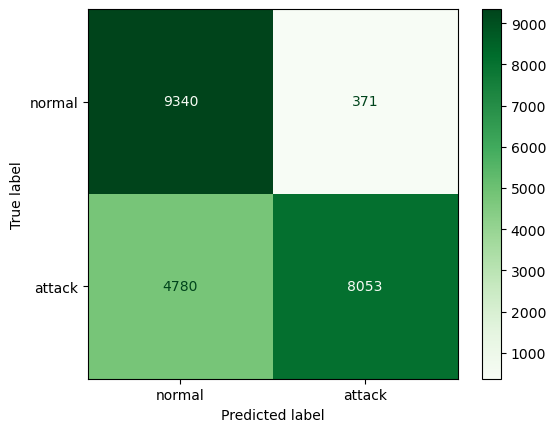

In [238]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["normal", "attack"])
disp.plot(cmap=plt.cm.Greens)
plt.show()

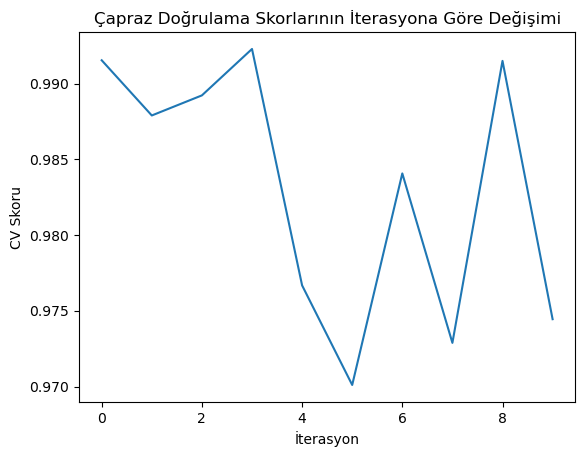

In [63]:
results = random_search.cv_results_
mean_test_scores = results["mean_test_score"]
plt.plot(mean_test_scores)
plt.xlabel('İterasyon')
plt.ylabel('CV Skoru')
plt.title('Çapraz Doğrulama Skorlarının İterasyona Göre Değişimi')
plt.show()

In [151]:
mlpc_params = {"alpha": [0.01, 0.0001],
              "hidden_layer_sizes": [(60,), (70,), (80,),(100,)],
              "solver" : ["adam","sgd"],
              "activation": ["tanh","logistic"]}

In [153]:
mlp_model = MLPClassifier(random_state = 42)

In [155]:
random_search = RandomizedSearchCV(mlp_model, param_distributions=mlpc_params, n_iter=10, cv=5, random_state=42, n_jobs = -1)

In [157]:
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'logistic'],
                                        'alpha': [0.01, 0.0001],
                                        'hidden_layer_sizes': [(60,), (70,),
                                                               (80,), (100,)],
                                        'solver': ['adam', 'sgd']},
                   random_state=42)

In [ ]:
random_search.best_params_

In [161]:
random_search.cv_results_

{'mean_fit_time': array([78.38612847, 61.99637785, 42.07116294, 71.69602804, 54.4408246 ,
        53.17508316, 84.52594919, 75.31211138, 57.09011521, 36.84168043]),
 'std_fit_time': array([2.3438306 , 3.77028607, 3.2353934 , 1.45566554, 7.81706696,
        2.3702159 , 8.72985457, 1.74009771, 9.28384489, 1.67183211]),
 'mean_score_time': array([0.04523239, 0.07979789, 0.03649325, 0.04323378, 0.05493884,
        0.04487934, 0.06895337, 0.04078441, 0.03108535, 0.02730994]),
 'std_score_time': array([0.00488603, 0.04275828, 0.00313982, 0.00556345, 0.02061124,
        0.01444693, 0.00579237, 0.00906314, 0.01011107, 0.00499757]),
 'param_solver': masked_array(data=['sgd', 'sgd', 'adam', 'sgd', 'adam', 'sgd', 'adam',
                    'sgd', 'adam', 'adam'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(80,), (100,), (60,), (60

In [163]:
mlp_model = MLPClassifier(random_state = 42, solver = 'adam', hidden_layer_sizes = (60,), alpha = 0.0001, activation = "tanh")

In [165]:
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(60,), random_state=42)

In [167]:
y_pred = mlp_model.predict(X_test_scaled)

In [169]:
accuracy_score(y_test, y_pred)

0.748181334279631

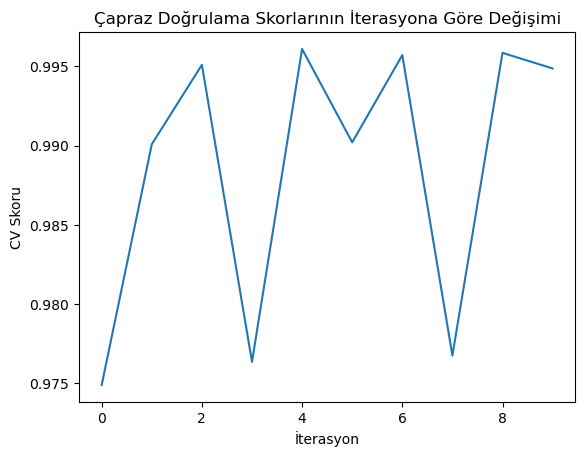

In [171]:
results = random_search.cv_results_
mean_test_scores = results["mean_test_score"]
plt.plot(mean_test_scores)
plt.xlabel('İterasyon')
plt.ylabel('CV Skoru')
plt.title('Çapraz Doğrulama Skorlarının İterasyona Göre Değişimi')
plt.show()

In [100]:
svc_params = {'C': [0.001, 1, 100],  
              'gamma': [100, 1, 0.001] }

In [102]:
svc_model = SVC()

In [110]:
X_sampled, _, y_sampled, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
scaler.fit(X_sampled)

StandardScaler()

In [112]:
X_sampled_scaled = scaler.transform(X_sampled)

In [116]:
random_search = RandomizedSearchCV(svc_model, param_distributions=svc_params, n_iter=5, cv=5, random_state=42, n_jobs = -1)

In [118]:
random_search.fit(X_sampled_scaled, y_sampled)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.001, 1, 100],
                                        'gamma': [100, 1, 0.001]},
                   random_state=42)

In [120]:
random_search.best_params_

{'gamma': 1, 'C': 100}

In [122]:
random_search.cv_results_

{'mean_fit_time': array([ 2.23747454, 13.71941633,  1.76150613, 14.17289739,  1.0332386 ]),
 'std_fit_time': array([0.08306853, 0.63703897, 0.31527607, 0.22398385, 0.07922019]),
 'mean_score_time': array([ 2.98270555, 10.67212129,  0.44398069,  9.91301723,  2.11303015]),
 'std_score_time': array([1.32014958, 8.71025132, 0.03288779, 8.71896139, 0.20566057]),
 'param_gamma': masked_array(data=[1, 1, 0.001, 100, 0.001],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[100, 0.001, 1, 0.001, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 1, 'C': 100},
  {'gamma': 1, 'C': 0.001},
  {'gamma': 0.001, 'C': 1},
  {'gamma': 100, 'C': 0.001},
  {'gamma': 0.001, 'C': 100}],
 'split0_test_score': array([0.9952381 , 0.81904762, 0.97142857, 0.53531746, 0.98571429]),
 'split1_test_score': array([0.99007937, 0.80436508, 0.96309

In [332]:
svc_model = SVC(C = 100, gamma = 0.01)

In [334]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.01)

In [336]:
y_pred = svc_model.predict(X_test_scaled)

In [338]:
accuracy_score(y_test, y_pred)

0.7806955287437899

In [250]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[9404  307]
 [4637 8196]]


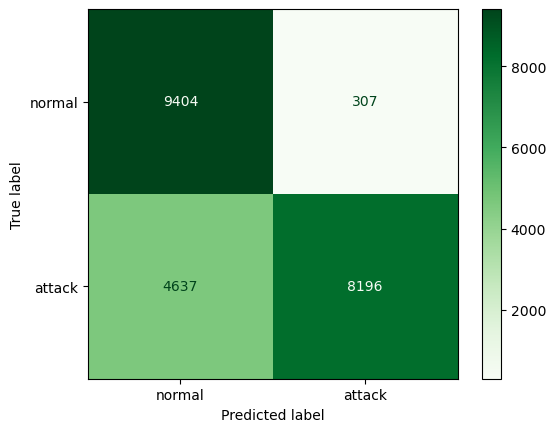

In [252]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["normal", "attack"])
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [140]:
svc_model = SVC(C = 100, gamma = 1)

In [142]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1)

In [144]:
y_pred = svc_model.predict(X_test_scaled)

In [146]:
accuracy_score(y_test, y_pred)

0.7195262597586941

In [148]:
svc_model = SVC(C = 100, gamma = 0.001)

In [150]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001)

In [152]:
y_pred = svc_model.predict(X_test_scaled)

In [154]:
accuracy_score(y_test, y_pred)

0.7512420156139106

In [156]:
svc_model = SVC(C = 1, gamma = 0.001)

In [158]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.001)

In [160]:
y_pred = svc_model.predict(X_test_scaled)

In [162]:
accuracy_score(y_test, y_pred)

0.7239176721078779

In [164]:
svc_model = SVC(C = 0.001, gamma = 1)

In [166]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=0.001, gamma=1)

In [168]:
y_pred = svc_model.predict(X_test_scaled)

In [170]:
accuracy_score(y_test, y_pred)

0.6550745209368346

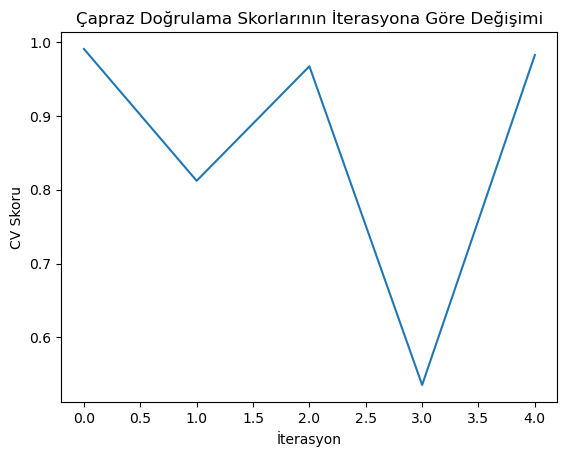

In [172]:
results = random_search.cv_results_
mean_test_scores = results["mean_test_score"]
plt.plot(mean_test_scores)
plt.xlabel('İterasyon')
plt.ylabel('CV Skoru')
plt.title('Çapraz Doğrulama Skorlarının İterasyona Göre Değişimi')
plt.show()